# DDoS Network Intrusion Detection and Classification

In [35]:
import warnings
warnings.filterwarnings("ignore")

time: 14.7 ms


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

time: 142 ms


In [37]:
pwd

'/Users/karlamuller/my_notebooks'

time: 4.04 ms


In [38]:
# This extension for sound notification and cell completion time
get_ipython().magic('load_ext cellevents')

The cellevents extension is already loaded. To reload it, use:
  %reload_ext cellevents
time: 1.51 ms


## Loading dataframe with all attacks

In [39]:
# Data after EDA
df_clean = pd.read_csv('mydata/ddos_clean.csv')

time: 8.73 s


In [40]:
# Run df_clean for running models and further anlyses
all_df = df_clean.copy()

time: 323 ms


### EDA

In [41]:
all_df.columns

Index(['Unnamed: 0', ' Flow Duration', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Flow Packets/s', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Packet Length Std', ' Packet Length Variance',
       ' Average Packet Size', ' Avg Fwd Segment Size', ' Fwd Header Length.1',
       ' Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min', ' Label'],
      dtype='object')

time: 18.2 ms


In [42]:
# Checking unbalance
all_df[' Label'].value_counts()

1    904498
3    818656
5    626929
2    435986
4    316458
0      7874
Name:  Label, dtype: int64

time: 77.6 ms


In [43]:
# Sanity check for nans
pd.set_option('display.max_rows', None)
all_df.isna().sum()

Unnamed: 0                      0
 Flow Duration                  0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Std                    0
 Fwd IAT Max                    0
 Fwd IAT Min                    0
Bwd IAT Total                   0
 Bwd IAT Mean                   0
 Bwd IAT Std                    0
 Bwd IAT Max                    0
 Fwd Header Length              0
 Bwd Header Length              0
Fwd Packets/s                   0
 Bwd Packets/s                  0
 Packet Length Std              0
 Packet Length Variance         0
 Average Packet Size            0
 Avg Fwd Segment Size           0
 Fwd Header Length.1            0
 Subflow Fwd B

time: 691 ms


In [44]:
all_df.shape

(3110401, 42)

time: 7.85 ms


### Defining variables

In [45]:
# Defining vaariables 
X = all_df.iloc[:,:-1]
y = all_df.iloc[:,-1]

time: 1.12 s


### Splitting data

In [46]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1)

time: 4.92 s


### My first DT - unbalanced data

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

time: 1.8 ms


In [51]:
# This takes long
# GridSearch for decision tree classifier 
params = {'max_depth':[5, 10, 15, 20],
          'max_features': [10, 15, 20]}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)

grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.98
Best parameters:  {'max_depth': 15, 'max_features': 20}
Best estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
time: 11min 19s


In [52]:
# Instating moodel
my_DT = DecisionTreeClassifier(max_depth=15)
my_DT.fit(X_train,y_train)
print(f'Score on train: {my_DT.score(X_train, y_train)}')
print(f'Score on test: {my_DT.score(X_test, y_test)}')

Score on train: 0.9854355549125514
Score on test: 0.9845904311496413
time: 40.2 s


In [53]:
# Creating a dataframe for gini feature importance 
feat_imp=[X.columns, my_DT.feature_importances_]
df_feat_imp =pd.DataFrame(feat_imp).T
df_feat_imp = df_feat_imp.rename(columns= {0:'Variables', 1:'Gini_Importance'})

time: 81.1 ms


In [54]:
# Head of top features 
df_featimp = df_feat_imp.sort_values(by='Gini_Importance', ascending=False).head(5)

time: 15.2 ms


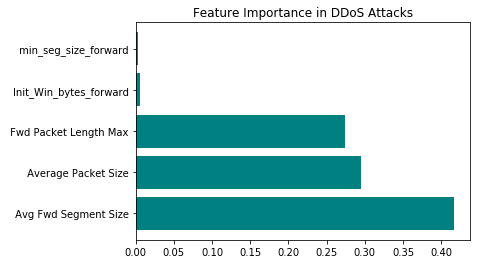

time: 326 ms


In [55]:
# Plot for feature importance
plt.figure()
plt.barh(df_featimp['Variables'], df_featimp['Gini_Importance'] , color = 'teal')
plt.title("Feature Importance in DDoS Attacks")
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix
# Defining y predict

y_pred = my_DT.predict(X_test)
from sklearn.metrics import confusion_matrix

# Confusion mastrix
confusion_matrix(y_test, y_pred)

array([[  1559,      4,      1,      3,      4,      4],
       [     4, 175616,   4373,     71,      0,    836],
       [     0,    300,  86864,      3,      0,     30],
       [     1,   2023,     28, 161635,      1,     43],
       [     6,      4,      5,      2,  63273,      2],
       [     3,   1666,    118,     50,      1, 123548]])

time: 629 ms


In [57]:
# Creating c olor gradient dataframe for confusion matrix
con_mat = confusion_matrix(y_test, y_pred) 
df_conmat = pd.DataFrame(con_mat, columns=['Predictec Class 0', 'Predicted Class 1','Predicted Class 2','Predicted Class 3','Predicted Class 4','Predicted Class 5'] )
df_conmat = df_conmat.rename('True {}'.format)
df_conmat.style.background_gradient(cmap='GnBu')

,Predictec Class 0,Predicted Class 1,Predicted Class 2,Predicted Class 3,Predicted Class 4,Predicted Class 5
True 0,1559,4,1,3,4,4
True 1,4,175616,4373,71,0,836
True 2,0,300,86864,3,0,30
True 3,1,2023,28,161635,1,43
True 4,6,4,5,2,63273,2
True 5,3,1666,118,50,1,123548


time: 489 ms


In [58]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1575
           1       0.98      0.97      0.97    180900
           2       0.95      1.00      0.97     87197
           3       1.00      0.99      0.99    163731
           4       1.00      1.00      1.00     63292
           5       0.99      0.99      0.99    125386

    accuracy                           0.98    622081
   macro avg       0.99      0.99      0.99    622081
weighted avg       0.98      0.98      0.98    622081

time: 758 ms


### My second DT - Resampled balanced data

In [59]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Undersampling for more managable data
print('Original dataset shape %s' % Counter(y_train))
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Original dataset shape Counter({1: 723598, 3: 654925, 5: 501543, 2: 348789, 4: 253166, 0: 6299})
Resampled dataset shape Counter({0: 6299, 1: 6299, 2: 6299, 3: 6299, 4: 6299, 5: 6299})
time: 1.36 s


In [60]:
# GridSearch for second decision tree classifier 
params = {'max_depth':[5,10,15,20],
          'max_features': [5,10,15,20]}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)

grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.99
Best parameters:  {'max_depth': 10, 'max_features': 20}
Best estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
time: 4.48 s


In [61]:
# DT for balanced train data
my_DT2 = DecisionTreeClassifier(max_depth=10)
my_DT2.fit(X_train,y_train)
print(f'Score on train: {my_DT2.score(X_train, y_train)}')
print(f'Score on test: {my_DT2.score(X_test, y_test)}')

Score on train: 0.9889400433931311
Score on test: 0.9820650365466876
time: 436 ms


In [62]:
# New feature importance dataframe
feat_imp2 = [X.columns, my_DT2.feature_importances_]
df_featimp2 = pd.DataFrame(feat_imp).T
df_featimp2 = df_featimp2.rename(columns= {0:'Variables', 1:'Gini_Importance'})
df_featimp2 = df_featimp2.sort_values(by='Gini_Importance', ascending=False).head()
df_featimp2

,Variables,Gini_Importance
27,Avg Fwd Segment Size,0.417182
26,Average Packet Size,0.294797
3,Fwd Packet Length Max,0.273721
30,Init_Win_bytes_forward,0.00582165
32,min_seg_size_forward,0.00303759


time: 19.6 ms


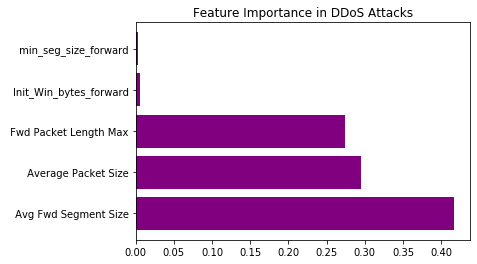

time: 123 ms


In [63]:
# Feature importance plot for DT2
plt.figure()
plt.barh(df_featimp2['Variables'], df_featimp2['Gini_Importance'] , color = 'purple')
plt.title("Feature Importance in DDoS Attacks")
plt.show()

In [64]:
# Defining y predict
y_pred2 = my_DT2.predict(X_test)
from sklearn.metrics import confusion_matrix

# Confusion mastrix
confusion_matrix(y_test, y_pred2)

array([[  1573,      0,      0,      2,      0,      0],
       [    26, 175035,   4915,    125,      0,    799],
       [    11,    624,  86541,      1,      3,     17],
       [    38,   2027,     29, 161515,      0,    122],
       [    65,      3,      4,      0,  63220,      0],
       [    62,   1966,    190,    127,      1, 123040]])

time: 567 ms


In [65]:
# Creating color gradient dataframe for confusion matrix
con_mat = confusion_matrix(y_test, y_pred2) 
df_conmat = pd.DataFrame(con_mat, columns=['Predictec Class 0', 'Predicted Class 1','Predicted Class 2','Predicted Class 3','Predicted Class 4','Predicted Class 5'] )
df_conmat = df_conmat.rename('True {}'.format)
df_conmat.style.background_gradient(cmap='BuPu')

,Predictec Class 0,Predicted Class 1,Predicted Class 2,Predicted Class 3,Predicted Class 4,Predicted Class 5
True 0,1573,0,0,2,0,0
True 1,26,175035,4915,125,0,799
True 2,11,624,86541,1,3,17
True 3,38,2027,29,161515,0,122
True 4,65,3,4,0,63220,0
True 5,62,1966,190,127,1,123040


time: 391 ms


In [66]:
# Classification report for DT2
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1575
           1       0.97      0.97      0.97    180900
           2       0.94      0.99      0.97     87197
           3       1.00      0.99      0.99    163731
           4       1.00      1.00      1.00     63292
           5       0.99      0.98      0.99    125386

    accuracy                           0.98    622081
   macro avg       0.97      0.99      0.98    622081
weighted avg       0.98      0.98      0.98    622081

time: 741 ms


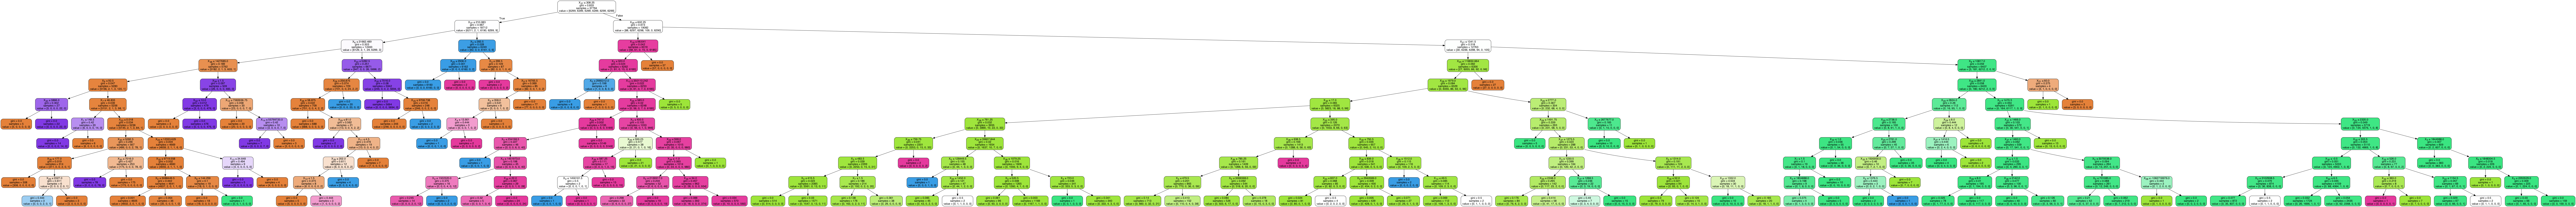

time: 3.94 s


In [68]:
# DT2 tree plot
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data2 = StringIO()

export_graphviz(my_DT2, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph.create_png())

### DT3 - max_depth = 5

In [69]:
# DT3 with mmax depth 5
my_DT3 = DecisionTreeClassifier(max_depth=5)
my_DT3.fit(X_train,y_train)
print(f'Score on train: {my_DT3.score(X_train, y_train)}')
print(f'Score on test: {my_DT3.score(X_test, y_test)}')

Score on train: 0.9825104513944012
Score on test: 0.9770672950950118
time: 358 ms


In [70]:
# Defining y predict
y_pred3 = my_DT3.predict(X_test)
from sklearn.metrics import confusion_matrix

# Confusion mastrix
confusion_matrix(y_test, y_pred3)

array([[  1573,      0,      0,      0,      2,      0],
       [    26, 173903,   5564,      0,      0,   1407],
       [    14,   1099,  86081,      0,      3,      0],
       [   331,   2018,     34, 161194,      0,    154],
       [  1199,      3,      4,      0,  62086,      0],
       [   126,   2086,    189,      7,      0, 122978]])

time: 547 ms


In [71]:
# Classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1575
           1       0.97      0.96      0.97    180900
           2       0.94      0.99      0.96     87197
           3       1.00      0.98      0.99    163731
           4       1.00      0.98      0.99     63292
           5       0.99      0.98      0.98    125386

    accuracy                           0.98    622081
   macro avg       0.90      0.98      0.92    622081
weighted avg       0.98      0.98      0.98    622081

time: 725 ms


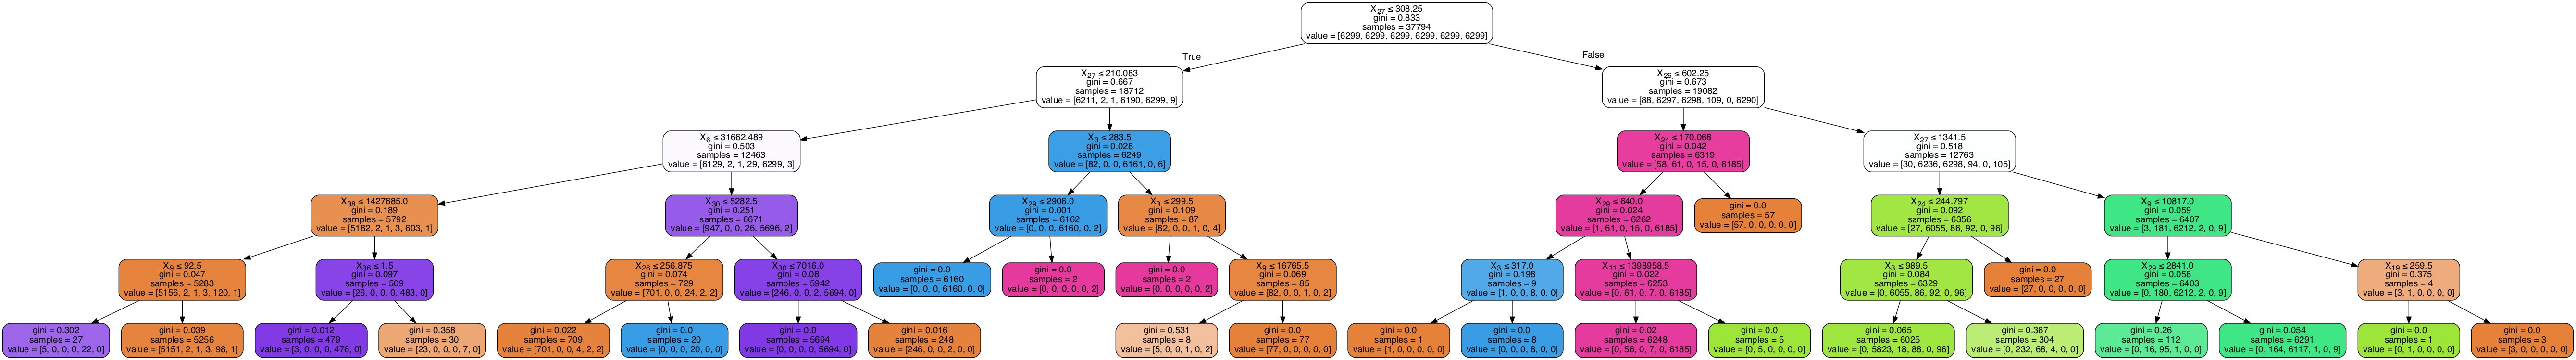

time: 1.36 s


In [73]:
# DT3 plot max depth 5
dot_data3 = StringIO()

export_graphviz(my_DT3, out_file=dot_data3,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data3.getvalue())  
Image(graph.create_png())

### My 1st logistic regression

In [74]:
# Searching optimal hyperparameters
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
            ,'penalty': ['l1','l2']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.33
Best parameters:  {'C': 0.001, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
time: 29.2 s


In [77]:
my_logreg = LogisticRegression(C=0.001)
my_logreg.fit(X_train,y_train)
print(f'Score on train: {my_logreg.score(X_train, y_train)}')
print(f'Score on test: {my_logreg.score(X_test, y_test)}')

Score on train: 0.33523839762925334
Score on test: 0.27883185630167134
time: 1.18 s


In [78]:
# Pickling top model for reuse
import joblib
joblib.dump(my_DT2, 'my_dt2.pkl')

['my_dt2.pkl']

time: 4.83 ms
